In [15]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv('GaussianMixture.csv')
pi1 = 1/3
mu1 = 4
sigma1 = 1

pi2 = 1/3
mu2 = 5
sigma2 = 1

pi3 = 1/3
mu3 = 6
sigma3 = 1
K = [1,2,3]

In [17]:
def normpdf(x, mean, sd, pi):
    var = float(sd)**2
    coef = 1/np.sqrt(2*pi*var)
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return coef*num/denom

In [18]:
def normpdf1(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [19]:
adj_vals = [mu1,sigma1,pi1,mu2,sigma2,pi2,mu3,sigma3,pi3]
conv_flag = False
j=0
while conv_flag is not True:
    
    adj_vals = [mu1,sigma1,pi1,mu2,sigma2,pi2,mu3,sigma3,pi3]
    gamma1 = list()
    gamma2 = list()
    gamma3 = list()
    for k in K:
        for i in range(data.shape[0]):
    
            gamma_den = pi1*normpdf(data['X'][i], mu1, sigma1, pi1) + pi2*normpdf(data['X'][i], mu2, sigma2, pi2) + pi3*normpdf(data['X'][i], mu3, sigma3, pi3)
            if k == 1: 
                gamma_num = pi1*normpdf(data['X'][i], mu1, sigma1, pi1)
                gamma1.append(gamma_num/gamma_den)

            elif k == 2:
                gamma_num = pi2*normpdf(data['X'][i], mu2, sigma2, pi2)
                gamma2.append(gamma_num/gamma_den)

            elif k == 3:
                gamma_num = pi3*normpdf(data['X'][i], mu3, sigma3, pi3)
                gamma3.append(gamma_num/gamma_den)
                
    for k in K:
        if k == 1: 
            mu1 = np.sum(gamma1*data['X'])/np.sum(gamma1)
            sigma1 = np.sqrt(np.sum(gamma1*(data['X']-mu1)**2)/np.sum(gamma1))
            pi1 = np.sum(gamma1)/len(gamma1)
        elif k == 2:
            mu2 = np.sum(gamma2*data['X'])/np.sum(gamma2)
            sigma2 = np.sqrt(np.sum(gamma2*(data['X']-mu2)**2)/np.sum(gamma2))
            pi2 = np.sum(gamma2)/len(gamma2)
        elif k == 3:
            mu3 = np.sum(gamma3*data['X'])/np.sum(gamma3)
            sigma3 = np.sqrt(np.sum(gamma3*(data['X']-mu3)**2)/np.sum(gamma3))
            pi3 = np.sum(gamma3)/len(gamma3)
        
    conv_test =  abs(np.subtract([mu1,sigma1,pi1,mu2,sigma2,pi2,mu3,sigma3,pi3], adj_vals))
    if max(conv_test) < 0.0001: conv_flag = True
    j = j + 1        
print(j)


47


In [20]:
print(mu1, mu2, mu3)
print(sigma1, sigma2, sigma3)
print(pi1, pi2, pi3)

1.5568308130748716 4.456021175657011 7.879453251792904
1.0838529140952151 1.2329633724209745 1.2021229124566255
0.3828638920888568 0.33694117288255215 0.28019493502859105


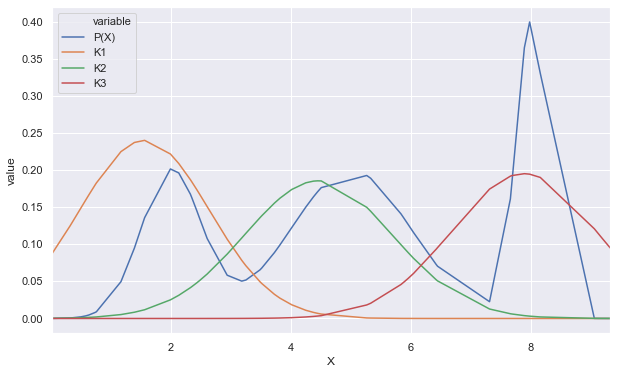

In [21]:
for i in range(len(data)):
    data.loc[i,'K1'] =normpdf(data.loc[i,'X'], mu1, sigma1, 1)
for i in range(len(data)):
    data.loc[i,'K2'] =normpdf(data.loc[i,'X'], mu2, sigma2, 1)
for i in range(len(data)):
    data.loc[i,'K3'] =normpdf(data.loc[i,'X'], mu3, sigma3, 1)
    
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='X', y='value', hue='variable', 
             data=pd.melt(data, ['X']))
ax.set_xlim(min(data['X']),max(data['X']))
plt.savefig('dists cam.png',bbox_inches = 'tight');

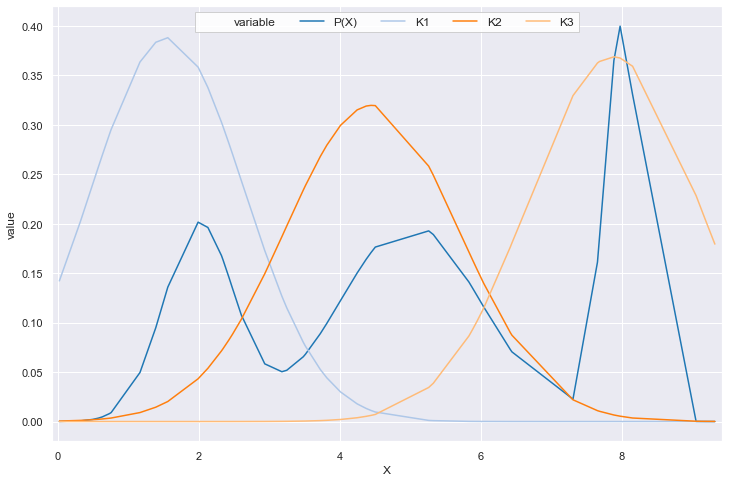

In [50]:
for i in range(len(data)):
    data.loc[i,'K1'] =normpdf(data.loc[i,'X'], mu1, sigma1, pi1)
for i in range(len(data)):
    data.loc[i,'K2'] =normpdf(data.loc[i,'X'], mu2, sigma2, pi2)
for i in range(len(data)):
    data.loc[i,'K3'] =normpdf(data.loc[i,'X'], mu3, sigma3, pi3)
    
sns.set()    
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='X', y='value', hue='variable', palette="tab20",
             data=pd.melt(data, ['X']))

ax.set_xlim(min(data['X']-.1),max(data['X']+.1))
# ax.text(0.5, 0.08, 'x', ha='center', va='center')
# ax.text(0.08, 0.1, 'Prob', ha='center', va='center', rotation='vertical')
ax.legend(loc='upper center',framealpha = 0.9, facecolor='w',fontsize='medium',
                ncol=5, fancybox=False, shadow=False)
plt.savefig('dists chris.png',bbox_inches = 'tight');

In [ ]:
data['K1'] = normpdf(data['X'], mu1, sigma1)
data['K2'] = normpdf(data['X'], mu2, sigma2)
data['K3'] = normpdf(data['X'], mu3, sigma3)

In [ ]:
ax = sns.lineplot(x='X', y='P(X)', data=data)
ax = sns.lineplot(x='X', y='P(X)', data=data)

In [ ]:
NormalDistribution(mu=mu1, std=sigma1)

In [ ]:
gamma = pi1